In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

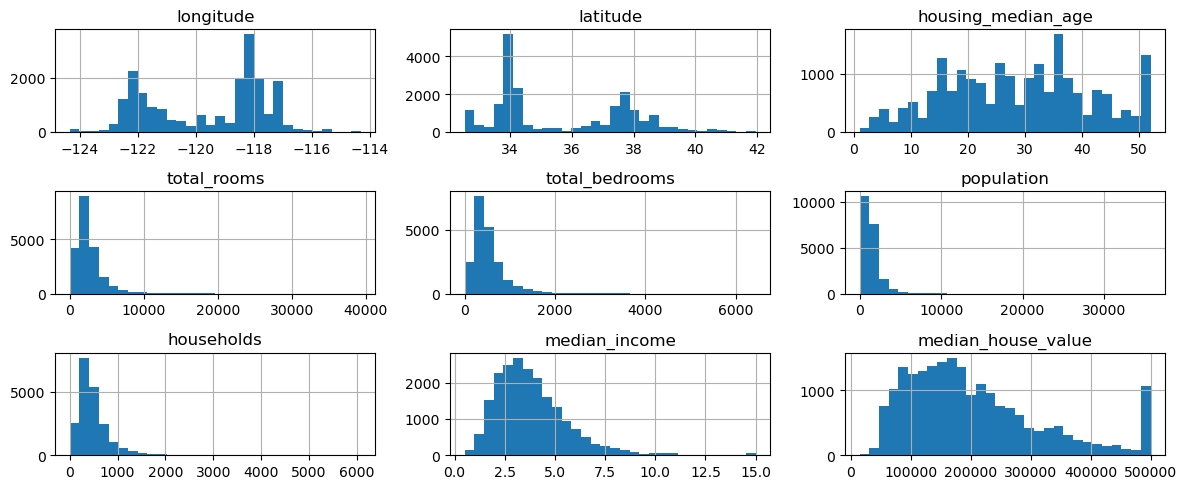

In [3]:
data.hist(figsize = (12,5), bins = 30)
plt.tight_layout()
plt.show()

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`


In [4]:
COLUMNS = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value' ]
TARGET = 'median_house_value'
data_selected = data[data['ocean_proximity'].isin(['<1H OCEAN','INLAND'])]
data_selected = data_selected[COLUMNS]

### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`

total_bedrooms

In [5]:
misses = data_selected.isna().mean()
misses[misses>0]

total_bedrooms    0.010008
dtype: float64

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295

1195

In [6]:
data_selected['population'].median()

1195.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.


In [7]:
SEED = 42
data_shuffled = shuffle(data_selected, random_state=SEED)

In [8]:
train, validate, test = np.split(data_shuffled, [int(.6*len(data_shuffled)), int(.8*len(data_shuffled))])

In [9]:
train['median_house_value'] = np.log1p(train['median_house_value'])
validate['median_house_value'] = np.log1p(validate['median_house_value'])
test['median_house_value'] = np.log1p(test['median_house_value'])

In [10]:
train.isna().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.009987
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
dtype: float64

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

Both are equally good

In [15]:


def fillna_data(df, fill):
    df = df.copy()
    df['total_bedrooms'] = df['total_bedrooms'].fillna(fill)
    return df

train_zero = fillna_data(train, 0)
validate_zero = fillna_data(validate, 0)
test_zero = fillna_data(test, 0)

mean_val = train['total_bedrooms'].mean()
train_mean= fillna_data(train, mean_val)
validate_mean = fillna_data(validate, mean_val)
test_mean = fillna_data(test, mean_val)

In [16]:
model = LinearRegression()

In [17]:
model.fit(train_zero.drop(TARGET,1),
          train_zero[TARGET])
val_preds = model.predict(validate_zero.drop(TARGET,1))
metric_zero = mean_squared_error(validate_zero[TARGET], val_preds, squared=False)
print('RMSE for zero imputation of total_bedrooms', round(metric_zero,2))

RMSE for zero imputation of total_bedrooms 0.34


C:\Users\user\AppData\Local\Temp\ipykernel_14120\3976422407.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  model.fit(train_zero.drop(TARGET,1),
C:\Users\user\AppData\Local\Temp\ipykernel_14120\3976422407.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  val_preds = model.predict(validate_zero.drop(TARGET,1))


In [18]:
model.fit(train_mean.drop(TARGET,1),
          train_mean[TARGET])
val_preds = model.predict(validate_mean.drop(TARGET,1))
metric_mean = mean_squared_error(validate_mean[TARGET], val_preds, squared=False)
print('RMSE for mean imputation of total_bedrooms', round(metric_mean,2))

RMSE for mean imputation of total_bedrooms 0.34


C:\Users\user\AppData\Local\Temp\ipykernel_14120\4153015764.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  model.fit(train_mean.drop(TARGET,1),
C:\Users\user\AppData\Local\Temp\ipykernel_14120\4153015764.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  val_preds = model.predict(validate_mean.drop(TARGET,1))


In [19]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


In [20]:
w0, w = train_linear_regression(train_zero.drop(TARGET,1), train_zero[TARGET])
val_pred = w0 + validate_zero.drop(TARGET,1).dot(w)
metric_zero = mean_squared_error(validate_zero[TARGET], val_pred, squared=False)
print('RMSE for zero imputation of total_bedrooms', round(metric_zero,2))

RMSE for zero imputation of total_bedrooms 0.34


C:\Users\user\AppData\Local\Temp\ipykernel_14120\2308103356.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  w0, w = train_linear_regression(train_zero.drop(TARGET,1), train_zero[TARGET])
C:\Users\user\AppData\Local\Temp\ipykernel_14120\2308103356.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  val_pred = w0 + validate_zero.drop(TARGET,1).dot(w)


In [21]:
w0, w = train_linear_regression(train_mean.drop(TARGET,1), train_mean[TARGET])
val_pred = w0 + train_mean.drop(TARGET,1).dot(w)
metric_mean = mean_squared_error(train_mean[TARGET], val_pred, squared=False)
print('RMSE for mean imputation of total_bedrooms', round(metric_mean,2))

RMSE for mean imputation of total_bedrooms 0.34


C:\Users\user\AppData\Local\Temp\ipykernel_14120\454891590.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  w0, w = train_linear_regression(train_mean.drop(TARGET,1), train_mean[TARGET])
C:\Users\user\AppData\Local\Temp\ipykernel_14120\454891590.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  val_pred = w0 + train_mean.drop(TARGET,1).dot(w)


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [22]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [23]:
metrics_df = pd.DataFrame(columns = ['r','RMSE'])
min_val = []
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    
    w0, w = train_linear_regression_reg(train_zero.drop(TARGET,1), train_zero[TARGET], r = r)
    val_pred = w0 + validate_zero.drop(TARGET,1).dot(w)
    metric_zero = mean_squared_error(validate_zero[TARGET], val_pred, squared=False)
    print(f'RMSE for {r} reg coeff and zero imputation of total_bedrooms', metric_zero)
    metrics_df = metrics_df.append(pd.Series({'r':r, 'RMSE':metric_zero}), ignore_index = True)
    
    if len(min_val) ==0:
        min_val= [r,metric_zero]
    else:
        if metric_zero < metric_zero:
            min_val= [r,metric_zero]

RMSE for 0 reg coeff and zero imputation of total_bedrooms 0.34092359963469615
RMSE for 1e-06 reg coeff and zero imputation of total_bedrooms 0.3409236024184097
RMSE for 0.0001 reg coeff and zero imputation of total_bedrooms 0.3409238785707567
RMSE for 0.001 reg coeff and zero imputation of total_bedrooms 0.3409264112951592
RMSE for 0.01 reg coeff and zero imputation of total_bedrooms 0.3409538483269193
RMSE for 0.1 reg coeff and zero imputation of total_bedrooms 0.3413635898949738
RMSE for 1 reg coeff and zero imputation of total_bedrooms 0.34497569168077397
RMSE for 5 reg coeff and zero imputation of total_bedrooms 0.34781958448845623
RMSE for 10 reg coeff and zero imputation of total_bedrooms 0.3483946973484454


C:\Users\user\AppData\Local\Temp\ipykernel_14120\1912329167.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  w0, w = train_linear_regression_reg(train_zero.drop(TARGET,1), train_zero[TARGET], r = r)
C:\Users\user\AppData\Local\Temp\ipykernel_14120\1912329167.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  val_pred = w0 + validate_zero.drop(TARGET,1).dot(w)
C:\Users\user\AppData\Local\Temp\ipykernel_14120\1912329167.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series({'r':r, 'RMSE':metric_zero}), ignore_index = True)
C:\Users\user\AppData\Local\Temp\ipykernel_14120\1912329167.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argumen

In [24]:
metrics_df.sort_values('RMSE', ascending = True)

,r,RMSE
0,0.000000,0.340924
1,0.000001,0.340924
2,0.000100,0.340924
3,0.001000,0.340926
4,0.010000,0.340954
5,0.100000,0.341364
6,1.000000,0.344976
7,5.000000,0.347820
8,10.000000,0.348395


In [25]:
print(f'Min RMSE = {min_val[1]} with r = {min_val[0]}')

Min RMSE = 0.34092359963469615 with r = 0


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

0.005

In [26]:
scores = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    data_shuffled = shuffle(data_selected, random_state=s)
    train, validate, test = np.split(data_shuffled, [int(.6*len(data_shuffled)), int(.8*len(data_shuffled))])

    train['median_house_value'] = np.log1p(train['median_house_value'])
    validate['median_house_value'] = np.log1p(validate['median_house_value'])
    test['median_house_value'] = np.log1p(test['median_house_value'])


    train_zero = fillna_data(train, 0)
    validate_zero = fillna_data(validate, 0)
    test_zero = fillna_data(test, 0)

    w0, w = train_linear_regression(train_zero.drop(TARGET,1), train_zero[TARGET])
    val_pred = w0 + validate_zero.drop(TARGET,1).dot(w)
    metric_zero = mean_squared_error(validate_zero[TARGET], val_pred, squared=False)
    print(f'RMSE for zero imputation of total_bedrooms with random seed {s}', round(metric_zero,2))
    scores.append(metric_zero)

RMSE for zero imputation of total_bedrooms with random seed 0 0.34
RMSE for zero imputation of total_bedrooms with random seed 1 0.34
RMSE for zero imputation of total_bedrooms with random seed 2 0.34
RMSE for zero imputation of total_bedrooms with random seed 3 0.33
RMSE for zero imputation of total_bedrooms with random seed 4 0.34
RMSE for zero imputation of total_bedrooms with random seed 5 0.34
RMSE for zero imputation of total_bedrooms with random seed 6 0.34
RMSE for zero imputation of total_bedrooms with random seed 7 0.35
RMSE for zero imputation of total_bedrooms with random seed 8 0.35
RMSE for zero imputation of total_bedrooms with random seed 9 0.33


C:\Users\user\AppData\Local\Temp\ipykernel_14120\2750275589.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  w0, w = train_linear_regression(train_zero.drop(TARGET,1), train_zero[TARGET])
C:\Users\user\AppData\Local\Temp\ipykernel_14120\2750275589.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  val_pred = w0 + validate_zero.drop(TARGET,1).dot(w)
C:\Users\user\AppData\Local\Temp\ipykernel_14120\2750275589.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  w0, w = train_linear_regression(train_zero.drop(TARGET,1), train_zero[TARGET])
C:\Users\user\AppData\Local\Temp\ipykernel_14120\2750275589.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be ke

In [29]:
print(f'STD of scores with different seeds = {round(np.std(scores),3)}')

STD of scores with different seeds = 0.006


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

0.33

In [31]:
data_shuffled = shuffle(data_selected, random_state=9)
train, validate, test = np.split(data_shuffled, [int(.6*len(data_shuffled)), int(.8*len(data_shuffled))])

train['median_house_value'] = np.log1p(train['median_house_value'])
validate['median_house_value'] = np.log1p(validate['median_house_value'])
test['median_house_value'] = np.log1p(test['median_house_value'])


train_zero = fillna_data(train, 0)
validate_zero = fillna_data(validate, 0)
test_zero = fillna_data(test, 0)

train_data_6 = pd.concat([train_zero,validate_zero])

w0, w = train_linear_regression_reg(train_zero.drop(TARGET,1), train_zero[TARGET], r = 0.001)
val_pred = w0 + validate_zero.drop(TARGET,1).dot(w)
metric_zero = mean_squared_error(validate_zero[TARGET], val_pred, squared=False)
print(f'RMSE for zero imputation of total_bedrooms with random seed 9 and r = 0.001', round(metric_zero,2))


RMSE for zero imputation of total_bedrooms with random seed 9 and r = 0.001 0.33


C:\Users\user\AppData\Local\Temp\ipykernel_14120\2077269752.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  w0, w = train_linear_regression_reg(train_zero.drop(TARGET,1), train_zero[TARGET], r = 0.001)
C:\Users\user\AppData\Local\Temp\ipykernel_14120\2077269752.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  val_pred = w0 + validate_zero.drop(TARGET,1).dot(w)
